### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [5]:
import os
from dotenv import load_dotenv
load_dotenv()

# os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [4]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f9f4fb6dbf', 'finish_reason': 'stop', 'logprobs': None}, id='run-902c91c5-ea3a-4466-a6c3-fea75daf2ca0-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [8]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="openai/gpt-oss-20b")
llm_groq.invoke("Hey I am VaibhaV and i like to play cricket")

AIMessage(content='Hey VaibhaV! 👋 It’s great to hear you’re into cricket. Do you play a particular position or have a favorite team or player you follow? I’d love to hear more about what you enjoy most about the game!', additional_kwargs={'reasoning_content': 'User says "Hey I am VaibhaV and i like to play cricket". We need to respond appropriately. The user hasn\'t asked a question. It\'s a statement. We can respond with greeting, maybe ask something about cricket. They are VaibhaV. We can ask what they like about cricket, favorite teams, or play cricket. Or ask for what they\'d like to discuss. The developer message is empty. There\'s no instruction that we must ask them. We can respond friendly.'}, response_metadata={'token_usage': {'completion_tokens': 157, 'prompt_tokens': 84, 'total_tokens': 241, 'completion_time': 0.131847091, 'prompt_time': 0.005925333, 'queue_time': 0.048881598, 'total_time': 0.137772424}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_fd68d84dd

### We Will start With Creating Nodes

In [9]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

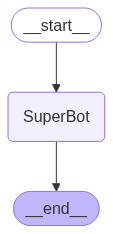

In [10]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [11]:
## Invocation

graph_builder.invoke({'messages':"Hi,My name is VaibhaV And I like cricket"})

{'messages': [HumanMessage(content='Hi,My name is VaibhaV And I like cricket', additional_kwargs={}, response_metadata={}, id='3489ad57-da4a-44a2-b389-739f784052f8'),
  AIMessage(content='Hey VaibhaV! 👋 Glad to meet a fellow cricket lover. Which team or player do you follow the most? And any recent matches that got you excited?', additional_kwargs={'reasoning_content': 'User: "Hi,My name is VaibhaV And I like cricket". We should respond in a friendly way, maybe ask about cricket. The user is a cricket fan. We can ask about favorite team, etc. They might want small conversation. Also we can ask about favorite player. Keep it casual.'}, response_metadata={'token_usage': {'completion_tokens': 109, 'prompt_tokens': 84, 'total_tokens': 193, 'completion_time': 0.090354429, 'prompt_time': 0.005989171, 'queue_time': 0.044183565, 'total_time': 0.0963436}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_fd68d84dd3', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': 

#### Streaming The responses

In [19]:
for event in graph_builder.stream({"messages":"Hello My name is VaihbaV"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content='Hello VaihbaV! How can I help you today?', additional_kwargs={'reasoning_content': 'We just greet.'}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 79, 'total_tokens': 106, 'completion_time': 0.022362239, 'prompt_time': 0.006357858, 'queue_time': 0.418578292, 'total_time': 0.028720097}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_fc8da5621e', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--1834b39e-4bc0-4c7d-a32c-5e47f8c50177-0', usage_metadata={'input_tokens': 79, 'output_tokens': 27, 'total_tokens': 106})]}}


In [20]:
for event in graph_builder.stream({"messages":"Hello My name is VaihbaV"}, stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hello My name is VaihbaV', additional_kwargs={}, response_metadata={}, id='77ef3e48-da90-47f1-aea7-fed7bc8a8962')]}
{'messages': [HumanMessage(content='Hello My name is VaihbaV', additional_kwargs={}, response_metadata={}, id='77ef3e48-da90-47f1-aea7-fed7bc8a8962'), AIMessage(content='Hello VaihbaV! How can I help you today?', additional_kwargs={'reasoning_content': 'User says hello. We just greet.'}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 79, 'total_tokens': 110, 'completion_time': 0.025779742, 'prompt_time': 0.005726228, 'queue_time': 0.045070082, 'total_time': 0.03150597}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_fc8da5621e', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--313c48f3-b494-4c3a-b4b8-785574783d2b-0', usage_metadata={'input_tokens': 79, 'output_tokens': 31, 'total_tokens': 110})]}


In [21]:
for event in graph_builder.stream({"messages":"Hello My name is VaihbaV"}, stream_mode="updates"):
    print(event)

{'SuperBot': {'messages': [AIMessage(content='Hello VaihbaV! 👋 How can I help you today?', additional_kwargs={'reasoning_content': 'We need to respond politely. Probably ask how to help.'}, response_metadata={'token_usage': {'completion_tokens': 37, 'prompt_tokens': 79, 'total_tokens': 116, 'completion_time': 0.030821274, 'prompt_time': 0.005708994, 'queue_time': 0.043995162, 'total_time': 0.036530268}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_fd68d84dd3', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--8c860d77-92de-4b68-a3b4-7926085ae888-0', usage_metadata={'input_tokens': 79, 'output_tokens': 37, 'total_tokens': 116})]}}
